# Supervised Learning (Regression)

**Dataset:** California Housing (sklearn)  
**Goal:** Predict **Median House Value** using supervised regression models.

Models covered:
- Linear Regression
- Support Vector Regression (SVR)
- Random Forest Regression
- Gradient Boosting Regression
- XGBoost Regression

For each model:
- Model performance evaluation (R², RMSE, MAE)
- Predict new data
- Save and load models (Pickle)

In [1]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from sklearn.datasets import fetch_california_housing

# Train-test split & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Saving & loading
import pickle
import joblib

pd.set_option("display.max_columns", None)


## Load California Housing Dataset

In [2]:
data = fetch_california_housing(as_frame=True)

df = data.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Dataset overview

In [3]:
print("Shape:", df.shape)
df.describe()


Shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**Target variable:** `MedHouseVal`  
This represents the median house value (in $100,000 units).


## Train-Test Split

In [4]:
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (16512, 8)
Test shape: (4128, 8)


## Helper functions for evaluation

In [5]:
def regression_metrics(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "RMSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred)
    }

def evaluate_regression_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    metrics = regression_metrics(y_test, y_pred)
    
    print(f"\n===== {model_name} =====")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")
    
    # Actual vs Predicted plot
    plt.figure(figsize=(5, 4))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{model_name} — Actual vs Predicted")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--")
    plt.show()
    
    return metrics, model


## 1) Linear Regression

In [6]:
# lin_reg = LinearRegression()
# metrics_lr, fitted_lr = evaluate_regression_model(
#     lin_reg, X_train, y_train, X_test, y_test, "Linear Regression"
# )



===== Linear Regression =====
R2: 0.5758
RMSE: 0.5559
MAE: 0.5332


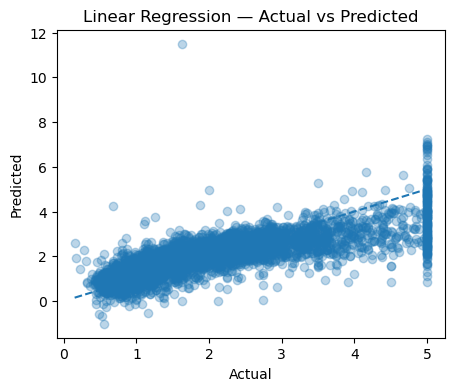

In [7]:
lin_reg = LinearRegression()
metrics_lr, fitted_lr = evaluate_regression_model(
    lin_reg, X_train, y_train, X_test, y_test, "Linear Regression"
)

## 3) Random Forest Regression


===== Random Forest Regression =====
R2: 0.8066
RMSE: 0.2534
MAE: 0.3266


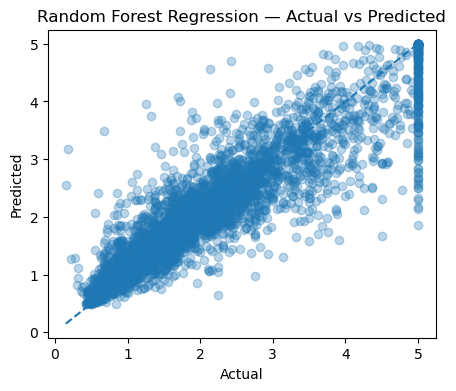

In [8]:
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

metrics_rf, fitted_rf = evaluate_regression_model(
    rf, X_train, y_train, X_test, y_test, "Random Forest Regression"
)


## 4) Gradient Boosting Regression


===== Gradient Boosting Regression =====
R2: 0.7756
RMSE: 0.2940
MAE: 0.3716


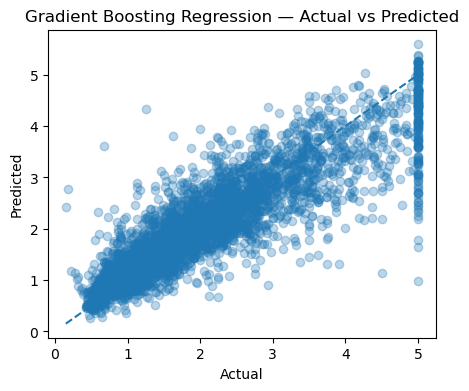

In [9]:
gbr = GradientBoostingRegressor(random_state=42)

metrics_gbr, fitted_gbr = evaluate_regression_model(
    gbr, X_train, y_train, X_test, y_test, "Gradient Boosting Regression"
)


## Model performance comparison

In [11]:
results = []

def add_result(name, metrics):
    row = {"Model": name}
    row.update(metrics)
    results.append(row)

add_result("Linear Regression", metrics_lr)
add_result("Random Forest", metrics_rf)
add_result("Gradient Boosting", metrics_gbr)

results_df = pd.DataFrame(results).sort_values(by="RMSE")
results_df


,Model,R2,RMSE,MAE
1,Random Forest,0.806600,0.253434,0.326607
2,Gradient Boosting,0.775645,0.293997,0.371643
0,Linear Regression,0.575788,0.555892,0.533200


## Predict new data

In [12]:
best_model = fitted_rf  # change if you prefer another model

new_data = X_test.sample(5, random_state=42)
display(new_data)

predictions = best_model.predict(new_data)
print("Predicted Median House Values:", np.round(predictions, 3))


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3752,2.8208,33.0,4.051020,1.158163,739.0,1.885204,34.17,-118.38
16705,4.3611,11.0,5.419753,0.962963,655.0,2.695473,35.06,-120.52
2915,4.3482,9.0,5.792453,1.103774,409.0,1.929245,35.36,-119.06
9728,4.5787,20.0,6.117371,0.995305,1361.0,3.194836,36.85,-121.65
3352,2.5000,19.0,6.153153,1.252252,302.0,2.720721,40.28,-120.96


Predicted Median House Values: [3.142 1.904 2.067 2.424 0.785]


## Saving and Loading Models

In [13]:
# Save model
pickle_path = "best_regression_model.pkl"

with open(pickle_path, "wb") as f:
    pickle.dump(best_model, f)


print("Saved:", pickle_path)


Saved: best_regression_model.pkl


In [14]:
# Load model back
with open("best_regression_model.pkl", "rb") as f:
    loaded_pickle_model = pickle.load(f)


print("Predictions from loaded Pickle model:", loaded_pickle_model.predict(new_data))


Predictions from loaded Pickle model: [3.14161717 1.9036267  2.06691    2.42397    0.78506667]
